# Text Classification of Dravidian languages - Tamil

In [81]:
import string
import re
import nltk
import numpy as np
import pandas as pd

In [25]:
def punctuation_removal(tamil_text): 
    punctuation_removed_words ="".join([t for t in tamil_text if t not in string.punctuation])  
    return punctuation_removed_words
#sentence of Tamil text (https://ta.wikipedia.org/wiki/%E0%AE%85%E0%AE%A3%E0%AF%81,_%E0%AE%AE%E0%AF%82%E0%AE%B2%E0%AE%95%E0%AF%8D%E0%AE%95%E0%AF%82%E0%AE%B1%E0%AF%81,_%E0%AE%92%E0%AE%B3%E0%AE%BF_%E0%AE%87%E0%AE%AF%E0%AE%B1%E0%AF%8D%E0%AE%AA%E0%AE%BF%E0%AE%AF%E0%AE%B2%E0%AF%8D)
#with punctuation laoded and the punctuations are removed
words_without_punctuation = punctuation_removal("அணு, மூலக்கூறு, ஒளி இயற்பியல் என்பது பருப்பொருள்-பருப்பொருள் மற்றும் ஒளிக்கற்றை-பருப்பொருள் இடையேயான தொடர்புகள் மற்றும் இடைவினைகளை விவரிக்கும் இயற்பியலின் ஒரு துறை ஆகும். இந்த இடைவிளைவுகள் ஒரு சில அணுக்களுக்கு இடையே அமைவதாகும். பொதுவாக இந்த இடைவினைகளால் ஏற்படும் ஆற்றலானது இலத்திரன்வோல்ட்டில் அளக்கப்படுகிறது")
print(words_without_punctuation) 

அணு மூலக்கூறு ஒளி இயற்பியல் என்பது பருப்பொருள்பருப்பொருள் மற்றும் ஒளிக்கற்றைபருப்பொருள் இடையேயான தொடர்புகள் மற்றும் இடைவினைகளை விவரிக்கும் இயற்பியலின் ஒரு துறை ஆகும் இந்த இடைவிளைவுகள் ஒரு சில அணுக்களுக்கு இடையே அமைவதாகும் பொதுவாக இந்த இடைவினைகளால் ஏற்படும் ஆற்றலானது இலத்திரன்வோல்ட்டில் அளக்கப்படுகிறது


In [26]:
def tokenization_of_words(tamil_text):
    t_words = re.split(" ",tamil_text)
    return t_words
tokenized_words = tokenization_of_words(words_without_punctuation)
print(tokenized_words)

['அணு', 'மூலக்கூறு', 'ஒளி', 'இயற்பியல்', 'என்பது', 'பருப்பொருள்பருப்பொருள்', 'மற்றும்', 'ஒளிக்கற்றைபருப்பொருள்', 'இடையேயான', 'தொடர்புகள்', 'மற்றும்', 'இடைவினைகளை', 'விவரிக்கும்', 'இயற்பியலின்', 'ஒரு', 'துறை', 'ஆகும்', 'இந்த', 'இடைவிளைவுகள்', 'ஒரு', 'சில', 'அணுக்களுக்கு', 'இடையே', 'அமைவதாகும்', 'பொதுவாக', 'இந்த', 'இடைவினைகளால்', 'ஏற்படும்', 'ஆற்றலானது', 'இலத்திரன்வோல்ட்டில்', 'அளக்கப்படுகிறது']


In [27]:
stop_words = nltk.corpus.stopwords.words("tamil")
def stop_words_removal(tamil_text):
    words_removed = " ".join([t for t in tamil_text if t not in stop_words])
    return words_removed
stop_words_removed = stop_words_removal(tokenized_words)
print(stop_words_removed, end=' ')

அணு மூலக்கூறு ஒளி இயற்பியல் பருப்பொருள்பருப்பொருள் ஒளிக்கற்றைபருப்பொருள் இடையேயான தொடர்புகள் இடைவினைகளை விவரிக்கும் இயற்பியலின் துறை இடைவிளைவுகள் அணுக்களுக்கு இடையே அமைவதாகும் பொதுவாக இடைவினைகளால் ஏற்படும் ஆற்றலானது இலத்திரன்வோல்ட்டில் அளக்கப்படுகிறது 

In [22]:
"""
#pip install googletrans==3.1.0a
#!pip install -U googletrans==3.1.0a
from googletrans import Translator
translator = Translator()
detected_language = translator.translate('வணக்கம்')
detected_language.src
***Could not run the code in Jupyter notebook despite trying to update googletrans package. A constant 'Attribute error' persisted.
However, the same was eliminated when the code was run in local Python IDLE***
"""

"\n!pip install -U googletrans==3.1.0a\n#pip install googletrans==3.1.0a\nfrom googletrans import Translator\ntranslator = Translator()\ndetected_language = translator.translate('வணக்கம்')\ndetected_language.src\n"

In [107]:
df_dataset = pd.read_csv(r'C:\Users\Naganathan Vijay\Tamil_NLP_project\CS675_project_Data\train_data\train_dataset_5.csv')
print(df_dataset.head())

                                                text language
0  பேருதான் விஷால், உடம்பெல்லாம் விஷம்: தாணு காட்டம்    tamil
1                   பிக் பாஸ் வீட்டிற்குப் புது வரவு    tamil
2  பண மோசடி: ’பேட் மேன்’ பட தயாரிப்பாளர் பிரேர்னா...    tamil
3        சென்சார் போர்ட் மீது வித்யா பாலன் விமர்சனம்    tamil
4  நாளை 2-வது ஒரு நாள் போட்டி: மீண்டும் அசத்துமா ...    tamil


In [108]:
print(df_dataset.language.value_counts())

tamil      3000
english    1800
Name: language, dtype: int64


In [109]:
df_dataset['classify'] = df_dataset.language.map({'english':0, 'tamil': 1})
df_dataset.head()

,text,language,classify
0,"பேருதான் விஷால், உடம்பெல்லாம் விஷம்: தாணு காட்டம்",tamil,1
1,பிக் பாஸ் வீட்டிற்குப் புது வரவு,tamil,1
2,பண மோசடி: ’பேட் மேன்’ பட தயாரிப்பாளர் பிரேர்னா...,tamil,1
3,சென்சார் போர்ட் மீது வித்யா பாலன் விமர்சனம்,tamil,1
4,நாளை 2-வது ஒரு நாள் போட்டி: மீண்டும் அசத்துமா ...,tamil,1


In [110]:
X = df_dataset.language
y = df_dataset.classify
print(X.shape)
print(y.shape)

(4800,)
(4800,)


In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (3600,)
X_test:  (1200,)
y_train:  (3600,)
y_test:  (1200,)


In [112]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train_array = vectorizer.fit_transform(X_train)
X_test_array = vectorizer.transform(X_test)
print(X_train_array)
print(X_test_array)

  (0, 1)	1
  (1, 0)	1
  (2, 0)	1
  (3, 0)	1
  (4, 0)	1
  (5, 1)	1
  (6, 1)	1
  (7, 1)	1
  (8, 1)	1
  (9, 1)	1
  (10, 0)	1
  (11, 0)	1
  (12, 0)	1
  (13, 1)	1
  (14, 0)	1
  (15, 0)	1
  (16, 0)	1
  (17, 1)	1
  (18, 1)	1
  (19, 1)	1
  (20, 1)	1
  (21, 0)	1
  (22, 1)	1
  (23, 0)	1
  (24, 0)	1
  :	:
  (3575, 0)	1
  (3576, 1)	1
  (3577, 1)	1
  (3578, 1)	1
  (3579, 1)	1
  (3580, 1)	1
  (3581, 1)	1
  (3582, 1)	1
  (3583, 1)	1
  (3584, 1)	1
  (3585, 0)	1
  (3586, 1)	1
  (3587, 1)	1
  (3588, 0)	1
  (3589, 1)	1
  (3590, 1)	1
  (3591, 0)	1
  (3592, 1)	1
  (3593, 0)	1
  (3594, 1)	1
  (3595, 1)	1
  (3596, 0)	1
  (3597, 1)	1
  (3598, 0)	1
  (3599, 0)	1
  (0, 1)	1
  (1, 1)	1
  (2, 0)	1
  (3, 1)	1
  (4, 1)	1
  (5, 1)	1
  (6, 1)	1
  (7, 1)	1
  (8, 1)	1
  (9, 0)	1
  (10, 1)	1
  (11, 0)	1
  (12, 1)	1
  (13, 1)	1
  (14, 1)	1
  (15, 1)	1
  (16, 1)	1
  (17, 0)	1
  (18, 0)	1
  (19, 1)	1
  (20, 1)	1
  (21, 0)	1
  (22, 0)	1
  (23, 1)	1
  (24, 0)	1
  :	:
  (1175, 0)	1
  (1176, 1)	1
  (1177, 1)	1
  (1178, 1)	1
  

In [113]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
NB_model = mnb.fit(X_train_array,y_train)
y_predicted = NB_model.predict(X_test_array)
y_predicted

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

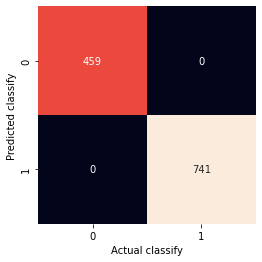

Accuracy Score is:  1.0


In [114]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
matrix = confusion_matrix(y_test,y_predicted)
sns.heatmap(matrix.T, square = True, annot=True, fmt = "d", cbar = False)
plt.xlabel("Actual classify")
plt.ylabel("Predicted classify")
plt.show()
print("Accuracy Score is: ",round(accuracy_score(y_test, y_predicted),4))